# Legendre Polynomials

## Definition
Legendre Polynomials are a system of complete and orthogonal polynomials, defined as the solutions of the **Legendre Differential Equation** given by:
$$\frac{d}{dx}\left[(1-x^2)\frac{d}{dx}P_n(x)\right] + n(n+1)P_n(x) = 0$$

## Rodrigues' Formula
The polynomials can also be generated using the corresponding Rodrigues's formula given by:
$$P_n(x) = \frac{1}{2^n \cdot n!}\frac{d^n}{dx^n}(x^2 - 1)^n$$

## Orthogonality
These poynomials are orthogonal, w.r.t the constant weight function $w(x) = 1$. The orthogonality relation for these polynomials is given by:
$$\int_{-1}^{1}P_n(x)P_m(x) = \frac{2\delta_{mn}}{2n + 1}$$

In this notebook I've used the `scipy.special.eval_legendre` function defined in the `scipy` library.

## Dependencies 
The following packages are required to run this notebook:
+ `numpy`
+ `scipy`
+ `matplotlib`

In [1]:
import numpy as np
from scipy.special import eval_legendre
import matplotlib.pyplot as plt
from matplotlib import animation

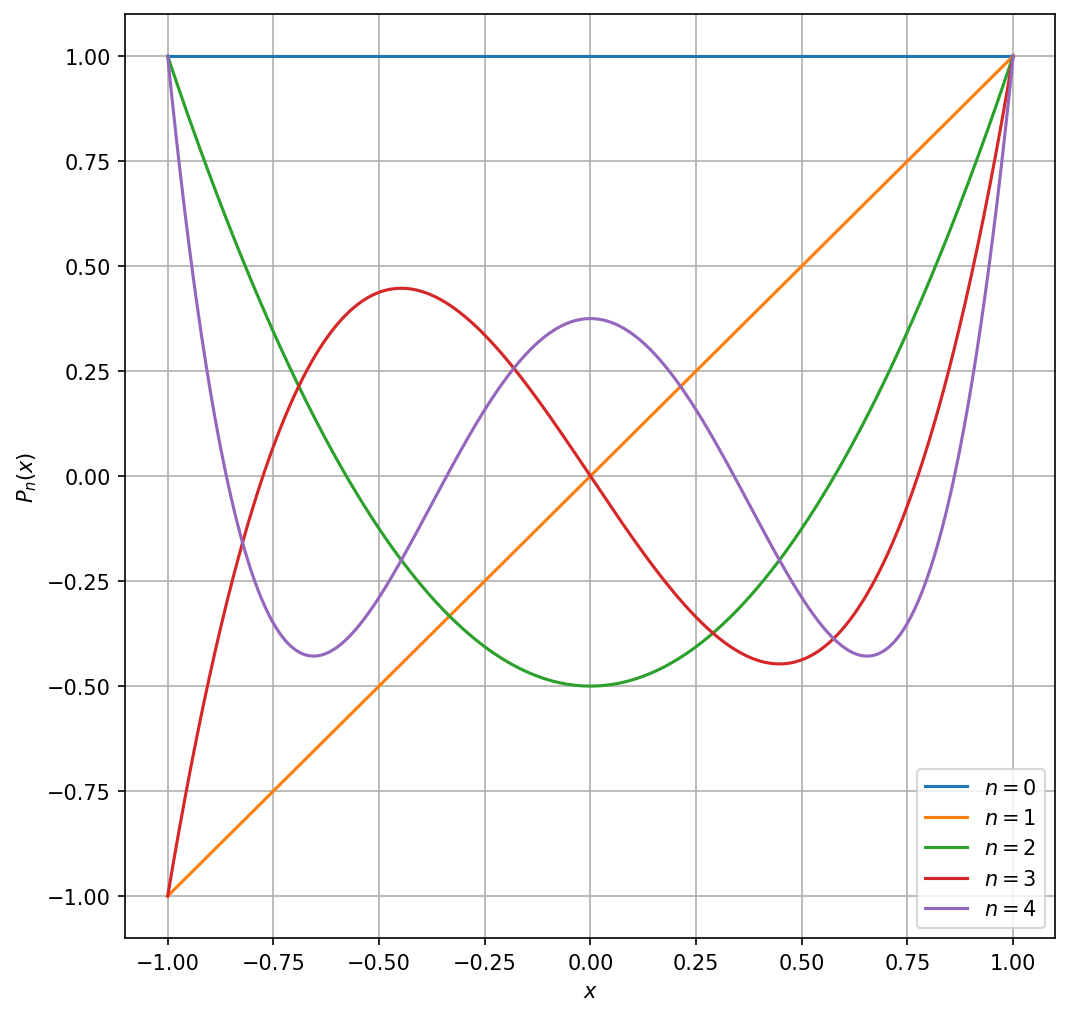

In [2]:
x = np.linspace(-1, 1, 1000)
fig, ax = plt.subplots(1, 1, dpi= 150, figsize=(8, 8))
[ax.plot(x, eval_legendre(n, x), label=f"$n = {n}$") for n in range(5)]
ax.set_xlabel("$x$")
ax.set_ylabel("$P_n(x)$")
ax.legend(loc="best")
ax.grid()

# Fourier-Legendre Decomposition
As previously mentioned, the Legendre Polynomials form a complete orthogonal set of functions in $[-1, 1]$. Hence, we can decompose any function defined in that domain into a series of Legendre Polynomials as follows:
$$f(x) = \sum_{n=0}^{n=\infty}a_nP_n(x)$$
where the coefficients $a_n$'s are given by:
$$a_n = \frac{2n+1}{2}\int_{-1}^{1}f(x)P_n(x)dx$$
due to the previously mentioned orthogonality relation.

## The given step function
The function we'll see the decomposition of, is $f : [-1, 1] \to \{-1, 0, 1\}$ defined as follows: 
$$ f(x)=   \left\{
\begin{array}{ll}
      1 & x>0 \\
      0 & x=0 \\
      -1 & x < 0 \\
\end{array} 
\right.$$

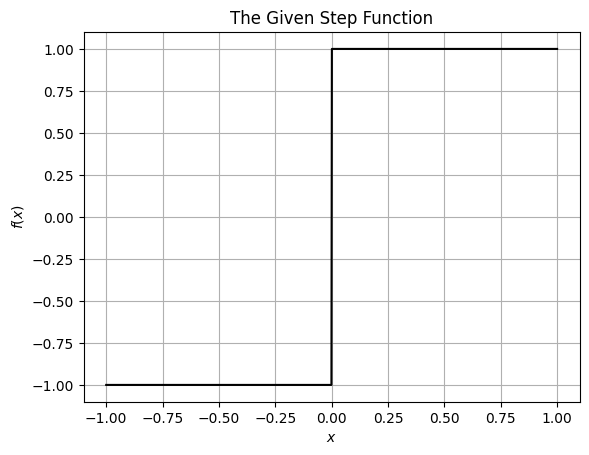

In [3]:
def f(x):
    return np.sign(x)
plt.plot(x, f(x), "k")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("The Given Step Function")
plt.grid()
plt.show()

## Calculating the Coefficients
We have to calculate the values of $a_n$'s. Observe that, since the function is odd, and $P_n(x)$ has the same parity as $n$, when $n$ is even, the integral mentioned before evaluates to 0. Hence we have $$a_{2k} = 0 ~~\forall k \in \mathbb{N}$$
Now, for odd values of $n$, the integrand is even, and hence the integral reduces to 
\begin{align*}
a_n &= (2n + 1)\int_{0}^{1}P_n(x)dx \\
    &= [P_{n+1}(x) - P_{n - 1}(x)] \Big\rvert_0^1 \\
    &= P_{n-1}(0) - P_{n+1}(0) \tag{Using a recurrence relation}
\end{align*}
Hence, we have 
$$f(x) = \sum_{n = 0}^{\infty}(P_{2n}(0) - P_{2n + 2}(0))P_{2n+1}(x)$$

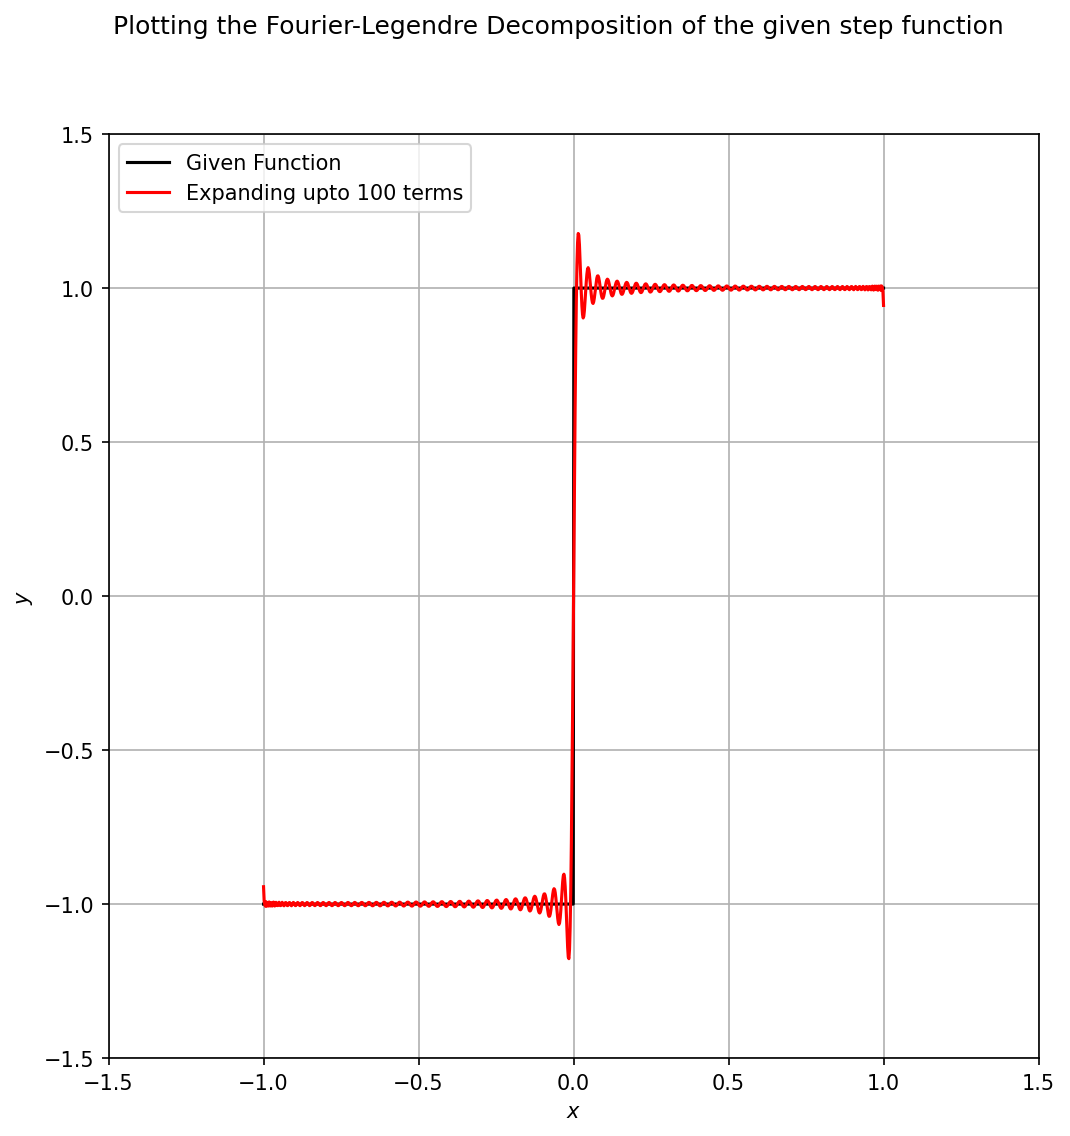

In [4]:
def series(x, n):
    return np.sum(np.array([(eval_legendre(2*k, 0) - eval_legendre(2*k + 2, 0)) * eval_legendre(2*k + 1, x) for k in range(n)]), axis=0)
data = []
N = 100

fig, ax = plt.subplots(1, 1, dpi=150, figsize=(8, 8))
for i in range(1, N + 1):
    data.append(series(x, i))

fig.suptitle("Plotting the Fourier-Legendre Decomposition of the given step function")
def animate(i):
    ax.clear()
    ax.plot(x, f(x), "k" ,label="Given Function")
    ax.plot(x, data[i], "r", label = f"Expanding upto {i + 1:3.0f} terms")
    ax.legend(loc = "upper left")
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.grid()

ani = animation.FuncAnimation(fig, animate, frames=N, interval=50)
ani.save('Legendre_animation.gif',writer='pillow',fps=20,dpi=100)
# ax.plot(x, data[-1])
plt.show()

## [You can download the generated animation here](https://github.com/TheSillyCoder/notebooks/raw/main/Legendre_animation.gif)

# Contributors
+ Debayan Sarkar (22MS002)

## [You'll find the latest version of this notebook here (In case I choose to update it in the future)](https://github.com/TheSillyCoder/notebooks/blob/main/Legendre_Polynomials.ipynb)